# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_cada
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* 3_T_Pts    -> Três Pontos Tentados
* 2_C_Pts    -> Dois Pontos Convertidos
* 2_T_Pts    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

In [1]:
# !pip install dataframe_image

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import dataframe_image as dfi

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# df = pd.read_csv("Total_de_acao_acao.csv")

In [6]:
# df = pd.read_csv("tabela_1_Minas_x_Flamengo.csv")

In [7]:
df = pd.read_csv("tabela_2_UNIFACISA_x_Rio Claro.csv")

In [8]:
# df = pd.read_csv("tabela_3_Fortaleza B. C._x_Rio Claro.csv")

In [9]:
# df = pd.read_csv("tabela_4_Minas_x_Botafogo.csv")

In [10]:
# df = pd.read_csv("tabela_5_Paulistano_x_São José.csv")

In [11]:
# df = pd.read_csv("tabela_7_UNIFACISA_x_Pato Basquete.csv")

In [12]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,101,86,NaN,fim_partida,NaN
1,1,4,00:00,101,86,NaN,fim_quarto,NaN
2,2,4,00:01,101,86,UFC,RD,Gemerson
3,3,4,00:03,101,86,RCB,2_Pts_T,Thiaguinho
4,4,4,00:08,101,86,RCB,RD,Ansaloni
...,...,...,...,...,...,...,...,...
570,570,1,10:00,0,0,UFC,substituicao_entra,D Nunes
571,571,1,10:00,0,0,UFC,substituicao_entra,Antonio
572,572,1,10:00,0,0,UFC,substituicao_entra,Gabriel
573,573,1,10:00,0,0,UFC,substituicao_entra,Spencer


# Informações básicas sobre o jogo 

## Precisa colocar algumas informações básicas sobre o jogo para que completar a tabela 

In [13]:
dia_do_jogo = dt.datetime.strptime('12/10/2019', '%d/%m/%Y')
temporada = 2019
nome_time_casa = 'UNIFACISA'
sigla_time_a = 'UFC'
sigla_time_b = 'RCB'
nome_time_fora = 'Rio Claro'
casa = 1
fora = 2
classificatoria = '1 Turno'

In [14]:
dia_do_jogo

datetime.datetime(2019, 10, 12, 0, 0)

# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [15]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [16]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [17]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [18]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [19]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [20]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [21]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 6)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 7)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [22]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

#  Acrescentamos mais colunas

In [23]:
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,101,86,NaN,fim_partida,NaN,15,-15
1,4,2400,101,86,NaN,fim_quarto,NaN,15,-15
2,4,2399,101,86,UFC,RD,Gemerson,15,-15
3,4,2397,101,86,RCB,2_Pts_T,Thiaguinho,15,-15
4,4,2392,101,86,RCB,RD,Ansaloni,15,-15
...,...,...,...,...,...,...,...,...,...
570,1,0,0,0,UFC,substituicao_entra,D Nunes,0,0
571,1,0,0,0,UFC,substituicao_entra,Antonio,0,0
572,1,0,0,0,UFC,substituicao_entra,Gabriel,0,0
573,1,0,0,0,UFC,substituicao_entra,Spencer,0,0


# Analise da pontuação dos times

In [24]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | 
               (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C')|
               (df['Indicador'] == 'EN')|
               (df['Indicador'] == 'fim_partida')]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,101,86,NaN,fim_partida,NaN,15,-15
8,4,2364,101,86,RCB,LL_Pts_C,Ansaloni,15,-15
17,4,2352,101,85,UFC,LL_Pts_C,João Vitor,16,-16
22,4,2352,100,85,UFC,2_Pts_C,João Vitor,15,-15
28,4,2315,98,85,RCB,2_Pts_C,Pedro,13,-13
...,...,...,...,...,...,...,...,...,...
538,1,108,5,6,RCB,2_Pts_C,Gerson,-1,1
543,1,93,5,4,RCB,LL_Pts_C,Lucious,1,-1
548,1,82,5,3,UFC,EN,D Nunes,2,-2
549,1,74,3,3,RCB,3_Pts_C,Sahdi,0,0


In [25]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
quartos = [600, 1200, 1800, 2400]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,15,3,0,UFC,3_Pts_C,D Nunes,3,-3
1,1,74,3,3,RCB,3_Pts_C,Sahdi,0,0
2,1,82,5,3,UFC,EN,D Nunes,2,-2
3,1,93,5,4,RCB,LL_Pts_C,Lucious,1,-1
4,1,108,5,6,RCB,2_Pts_C,Gerson,-1,1
...,...,...,...,...,...,...,...,...,...
95,4,2315,98,85,RCB,2_Pts_C,Pedro,13,-13
96,4,2352,100,85,UFC,2_Pts_C,João Vitor,15,-15
97,4,2352,101,85,UFC,LL_Pts_C,João Vitor,16,-16
98,4,2364,101,86,RCB,LL_Pts_C,Ansaloni,15,-15


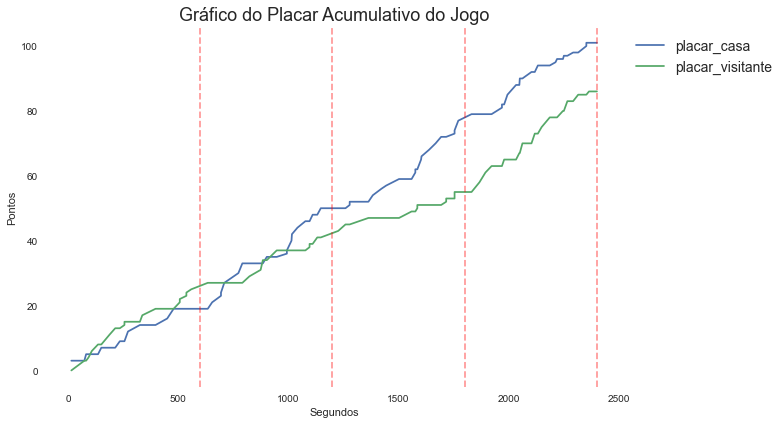

In [26]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(11,6))
tempo = pontuacao['Tempo']
pontuacao1 = pontuacao['placar_casa']
pontuacao2 = pontuacao['placar_visitante']
plt.plot(tempo, pontuacao1, label='placar_casa')
plt.plot(tempo, pontuacao2, label='placar_visitante')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.title('Gráfico do Placar Acumulativo do Jogo', fontsize=18)
plt.ylabel('Pontos')
plt.xlabel('Segundos')
plt.tight_layout()
plt.savefig('RELATORIO/teste.jpeg', format='jpg')

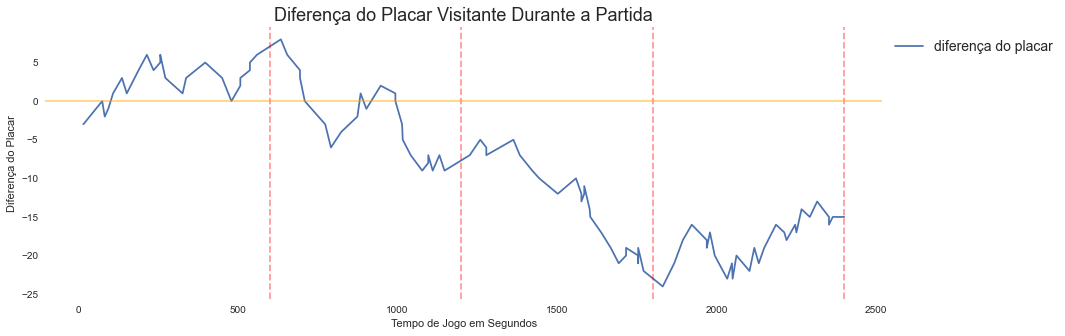

In [27]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'diferença do placar')
plt.title('Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

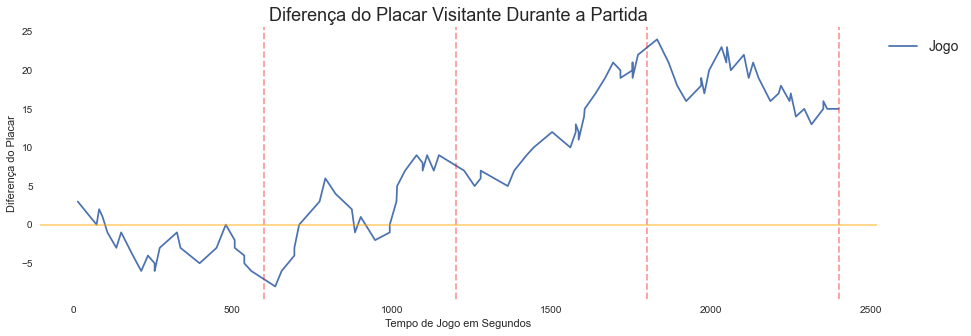

In [28]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_casa'], label = 'Jogo')
plt.title('Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

# Analisar os períodos positivos dos times

In [29]:
# Criar um novo dataFrame para analisar os períodos positivos dos times
data = pd.DataFrame()
data['Time'] = pontuacao['Time']
data['Indicador'] = pontuacao['Indicador']
data['diff_pontuacao'] = pontuacao['diferenca_placar_visitante']
data['Tempo'] = pontuacao['Tempo']
data

,Time,Indicador,diff_pontuacao,Tempo
0,UFC,3_Pts_C,-3,15
1,RCB,3_Pts_C,0,74
2,UFC,EN,-2,82
3,RCB,LL_Pts_C,-1,93
4,RCB,2_Pts_C,1,108
...,...,...,...,...
95,RCB,2_Pts_C,-13,2315
96,UFC,2_Pts_C,-15,2352
97,UFC,LL_Pts_C,-16,2352
98,RCB,LL_Pts_C,-15,2364


In [30]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
data["pontuacao"] = data["diff_pontuacao"].diff()
data["pontuacao"] = data["pontuacao"].apply(lambda x: abs(x))

In [31]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = data["diff_pontuacao"][0]
data.loc[0, 'pontuacao'] = novo_valor

In [32]:
data.reset_index(drop=True, inplace=True)

In [33]:
data['pontuacao'] = data['pontuacao'].astype(int)
data.head(15)

,Time,Indicador,diff_pontuacao,Tempo,pontuacao
0,UFC,3_Pts_C,-3,15,-3
1,RCB,3_Pts_C,0,74,3
2,UFC,EN,-2,82,2
3,RCB,LL_Pts_C,-1,93,1
4,RCB,2_Pts_C,1,108,2
5,RCB,2_Pts_C,3,136,2
6,UFC,2_Pts_C,1,151,2
7,RCB,3_Pts_C,4,188,3
8,RCB,2_Pts_C,6,214,2
9,UFC,2_Pts_C,4,235,2


In [34]:
data.to_csv('tempo2.csv')

In [35]:
# esse df é usado para retirar alguns argumentos que não fazem diferença 
# na função abaixo retiramos as listas vazias que o loop gera quando o time se repete 
def remove_item(my_list,*args):
    deletar = list(args)
    for item in deletar:
        while item in my_list:
            my_list.remove(item)
    return my_list

In [36]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# utilizado para determinar o tempo de início de cada período
tempo_a_inicio = []
tempo_b_inicio = []
# utilizado para agrupar os valores da pontuação dos times
time_a = []
time_b = []
# utilizados para somar os valores agrupados da pontuação 
soma_a = []
soma_b = []
# identificar o nome do time
nome_time_A = []
nome_time_B = []
for i in range(len(data)):
    # caso corresponda ao nome do time A
    if data['Time'][i] == sigla_time_a:
        # adiciona o valor da pontuação
        time_a.append(data['pontuacao'][i])
        ##########################################
        # pegam os valores acumulados do time B e as soma
        soma_b.append(sum(time_b))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_b = []
        # remove esses valores zerados
        soma_b = remove_item(soma_b, 0)
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # pega o primeiro valor do tempo de início
            tempo_a_inicio.append(data['Tempo'][i])
            # pega o primeiro valor do nome do time
            nome_time_A.append(data['Time'][i])
            flag = 1
        else:
            pass
    # caso corresponda ao nome do time B
    elif data['Time'][i] == sigla_time_b:
        # adiciona o valor da pontuação
        time_b.append(data['pontuacao'][i])
        #####################################################
        # pegam os valores acumulados do time A e as soma
        soma_a.append(sum(time_a))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_a = []
        # remove esses valores zerados
        soma_a = remove_item(soma_a, 0)
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # pega o primeiro valor do tempo de início
            tempo_b_inicio.append(data['Tempo'][i])
            # pega o primeiro valor do nome do time
            nome_time_B.append(data['Time'][i])
            flag = 0
        else:
            pass
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados 
        ultima_linha = data['Tempo'][i]
        # aplicamos as ultimas somas  para cada time
        soma_b.append(sum(time_b))
        soma_a.append(sum(time_a))
        # e removemos os valores que estão zerados 
        soma_a = remove_item(soma_a, 0)
        soma_b = remove_item(soma_b, 0)        

In [37]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_inicio) < len(tempo_b_inicio):
    tempo_a_inicio.append(ultima_linha)
    nome_time_A.append(nome_time_A[0])
    soma_a.append(np.nan)
# e acrescenta no a e agora tb acrescenta no B
elif len(tempo_a_inicio) > len(tempo_b_inicio):
    tempo_b_inicio.append(ultima_linha)
    nome_time_B.append(nome_time_B[0])
    soma_b.append(np.nan)

In [38]:
posse_de_bola_A = pd.DataFrame()
posse_de_bola_A['Time'] = nome_time_A
posse_de_bola_A['Tempo_de_Inicio'] = tempo_a_inicio
posse_de_bola_A['Tempo_de_Termino'] = tempo_b_inicio
posse_de_bola_A['Soma_Pontuacao'] = soma_a
posse_de_bola_A.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,UFC,15,74,-3
1,UFC,82,93,2
2,UFC,151,188,2
3,UFC,235,256,2
4,UFC,272,337,5
5,UFC,450,507,5
6,UFC,654,823,14
7,UFC,902,947,2
8,UFC,993,1096,11
9,UFC,1110,1131,2


In [39]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
del(tempo_a_inicio[0])
tempo_a_inicio.append(np.nan)

In [40]:
posse_de_bola_B = pd.DataFrame()
posse_de_bola_B['Time'] = nome_time_B
posse_de_bola_B['Tempo_de_Inicio'] = tempo_b_inicio
posse_de_bola_B['Tempo_de_Termino'] = tempo_a_inicio
posse_de_bola_B['Soma_Pontuacao'] = soma_b
posse_de_bola_B.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,RCB,74,82.0,3
1,RCB,93,151.0,5
2,RCB,188,235.0,5
3,RCB,256,272.0,2
4,RCB,337,450.0,4
5,RCB,507,654.0,8
6,RCB,823,902.0,7
7,RCB,947,993.0,3
8,RCB,1096,1110.0,2
9,RCB,1131,1147.0,2


In [41]:
posse_de_bola_bruta = pd.concat([posse_de_bola_A, posse_de_bola_B], ignore_index=True)

In [42]:
posse_de_bola_bruta.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [43]:
posse_de_bola_bruta["diff_pontuacao"] = posse_de_bola_bruta["Soma_Pontuacao"].diff()
posse_de_bola_bruta.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao,diff_pontuacao
0,UFC,15,74.0,-3,NaN
1,RCB,74,82.0,3,6.0
2,UFC,82,93.0,2,-1.0
3,RCB,93,151.0,5,3.0
4,UFC,151,188.0,2,-3.0
5,RCB,188,235.0,5,3.0
6,UFC,235,256.0,2,-3.0
7,RCB,256,272.0,2,0.0
8,UFC,272,337.0,5,3.0
9,RCB,337,450.0,4,-1.0


In [44]:
periodos_posteriores = []
for i in range(len(posse_de_bola_bruta)):
    if posse_de_bola_bruta['Soma_Pontuacao'][i] >= 5:
        periodo_potencial_a_positivo = 1
    else:
        if (posse_de_bola_bruta['diff_pontuacao'][i] <= -4) & (posse_de_bola_bruta['Soma_Pontuacao'][i] < 3):
            periodos_posteriores.append(posse_de_bola_bruta['Tempo_de_Inicio'][i])
            if periodo_potencial_a_positivo == 1:
                periodo_potencial_a_positivo = 0
            elif periodo_potencial_a_positivo != 1:
                periodo_potencial_a_positivo = 0

In [45]:
periodos_posteriores

[902, 1096, 1559, 1716, 2048]

In [46]:
periodos_iniciais = posse_de_bola_bruta[~posse_de_bola_bruta['Tempo_de_Inicio'].isin(periodos_posteriores)]
periodos_iniciais.reset_index(inplace=True, drop=True)
periodos_iniciais.head()

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao,diff_pontuacao
0,UFC,15,74.0,-3,NaN
1,RCB,74,82.0,3,6.0
2,UFC,82,93.0,2,-1.0
3,RCB,93,151.0,5,3.0
4,UFC,151,188.0,2,-3.0


In [47]:
flag = -1
tempo_a_peridodo_inicial = []
tempo_b_peridodo_inicial = []
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
pontuação_a = []
pontuação_b = []
nome_time_A = []
nome_time_B = []
# como o time do flamengo começa, o time de minas não apresenta o primeiro valor
# por causa disso é acrescentado um valor 0 que não existe 
potencial_final_periodo_a = 0
potencial_final_periodo_b = 0

for i in range(len(periodos_iniciais)):
    if periodos_iniciais['Time'][i] == sigla_time_a:
        if flag != 1:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_a_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_A.append(periodos_iniciais['Time'][i])
            pontuação_a.append(periodos_iniciais['Soma_Pontuacao'][i])
            ##################################################################
            tempo_b_peridodo_final.append(potencial_final_periodo_b)
            flag = 1
        else:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 1
    else:
        if flag != 0:
            tempo_a_peridodo_final.append(potencial_final_periodo_a)
            ############################################################
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_b_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_B.append(periodos_iniciais['Time'][i])
            pontuação_b.append(periodos_iniciais['Soma_Pontuacao'][i])
            flag = 0
        else:
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 0

In [48]:
periodos_A = pd.DataFrame()
periodos_A['Time'] = nome_time_A
periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
periodos_A['Soma_Pontuacao'] = pontuação_a

In [49]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada 
fim_b = tempo_b_peridodo_final
del(fim_b[0])
fim_b.append(np.nan)

In [50]:
periodos_B = pd.DataFrame()
periodos_B['Time'] = nome_time_B
periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
periodos_B['Soma_Pontuacao'] = pontuação_b

In [51]:
periodo = pd.concat([periodos_A, periodos_B], ignore_index=True)

In [52]:
periodo.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)
periodo.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,UFC,15,74.0,-3
1,RCB,74,82.0,3
2,UFC,82,93.0,2
3,RCB,93,151.0,5
4,UFC,151,188.0,2
5,RCB,188,235.0,5
6,UFC,235,256.0,2
7,RCB,256,272.0,2
8,UFC,272,337.0,5
9,RCB,337,450.0,4


In [53]:
periodo_final_a = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_a)]
periodo_final_a

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
8,UFC,272,337.0,5
10,UFC,450,507.0,5
12,UFC,654,823.0,14
14,UFC,993,1131.0,11
20,UFC,1383,1585.0,7
22,UFC,1602,1754.0,10
24,UFC,1771,1867.0,5
28,UFC,1994,2062.0,6


In [54]:
periodo_final_a_inicio = list(periodo_final_a['Tempo_de_Inicio'])
periodo_final_a_final = list(periodo_final_a['Tempo_de_Termino'])

In [55]:
periodo_final_a_inicio

[272, 450, 654, 993, 1383, 1602, 1771, 1994]

In [56]:
periodo_final_a_final

[337.0, 507.0, 823.0, 1131.0, 1585.0, 1754.0, 1867.0, 2062.0]

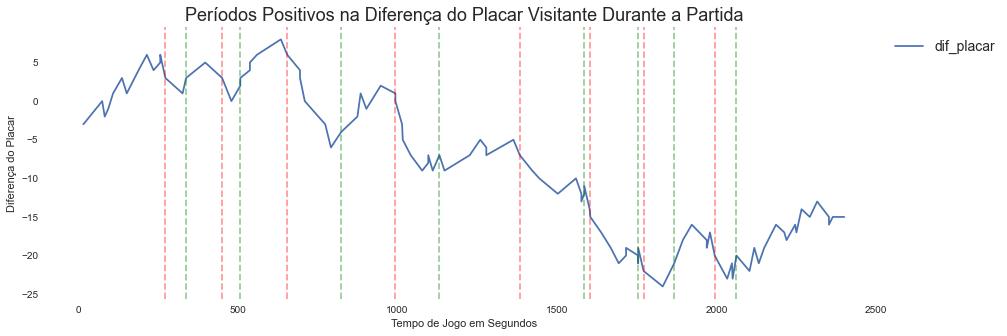

In [57]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_a_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_a_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste1.jpeg', format='jpg')

In [58]:
periodo_final_b = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_b)]

In [59]:
periodo_final_b_inicio = list(periodo_final_b['Tempo_de_Inicio'])
periodo_final_b_final = list(periodo_final_b['Tempo_de_Termino'])

In [60]:
periodo_final_b_inicio

[93, 188, 507, 823, 1867, 2149]

In [61]:
periodo_final_b_final

[151.0, 235.0, 654.0, 993.0, 1969.0, 2212.0]

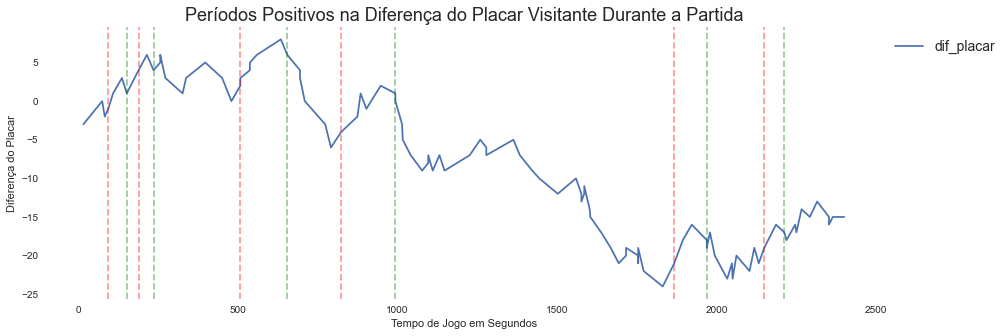

In [62]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_b_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_b_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste2.jpeg', format='jpg')

#### precisa fazer mais uma conta 

como as paradas são realizadas no primeiro momento em que se realiza ponto, nós perdemos as ações anteriores antes desse ponto acontecer
- A ideia é encontrar os pontos realizado (isso já foi realizado)
- depois precisa pegar esse ponto inicial e comparar em qual posse de bola se encontra esse inicio 
- ai sim podemos pegar o início da posse das ações que aconteceram anteriormente 

# Análise da Posse de Bola dos times

In [63]:
# usar esse flag para um DEF 
# ele retorna as váriaveis que eu quero e depois eu junto em um data frame

#### Quantas posses de bola há em um jogo?

In [64]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [65]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,15,3,0,UFC,3_Pts_C,D Nunes,3,-3
1,1,39,3,0,RCB,3_Pts_T,Ansaloni,3,-3
2,1,47,3,0,UFC,2_Pts_T,Barnes,3,-3
3,1,55,3,0,RCB,3_Pts_T,Ansaloni,3,-3
4,1,63,3,0,RCB,3_Pts_T,Pastor,3,-3
...,...,...,...,...,...,...,...,...,...
206,4,2364,101,86,RCB,LL_Pts_C,Ansaloni,15,-15
207,4,2364,101,86,RCB,LL_Pts_T,Ansaloni,15,-15
208,4,2387,101,86,UFC,2_Pts_T,Antonio,15,-15
209,4,2397,101,86,RCB,2_Pts_T,Thiaguinho,15,-15


In [66]:
posse_bola.to_csv('tempo2.csv')

In [67]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# valores finais da posse de bola
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
# identificar o nome do time
nome_time_A = []
nome_time_B = []
# identifica o tempo final
tempo_a_fim = 0
tempo_b_fim = 0
# soma 


for i in range(len(posse_bola)):
    # caso corresponda ao nome do time A
    if posse_bola['Time'][i] == sigla_time_a:
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # o loop do Time B é terminado 
            tempo_b_peridodo_final.append(tempo_b_fim)
            # pega o primeiro valor do tempo de início
            tempo_a_fim = posse_bola['Tempo'][i]
            # pega o primeiro valor do nome do time
            nome_time_A.append(posse_bola['Time'][i])
            flag = 1
        else:
            tempo_a_fim = posse_bola['Tempo'][i]
            flag = 1
    # caso corresponda ao nome do time B
    elif posse_bola['Time'][i] == sigla_time_b:
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # o loop do Time A é terminado 
            tempo_a_peridodo_final.append(tempo_a_fim)
            # pega o primeiro valor do tempo final
            tempo_b_fim = posse_bola['Tempo'][i]
            # pega o primeiro valor do nome do time
            nome_time_B.append(posse_bola['Time'][i])
            flag = 0
        else:
            tempo_b_fim = posse_bola['Tempo'][i]
            flag = 0
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados
        ultima_linha = posse_bola['Tempo'][i]
        if flag != 1:
            nome_time_B.append(posse_bola['Time'][i])
            tempo_b_peridodo_final.append(tempo_b_fim)
        elif flag != 0:
            nome_time_A.append(posse_bola['Time'][i])
            tempo_a_peridodo_final.append(tempo_a_fim)

In [68]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_peridodo_final) < len(tempo_b_peridodo_final):
    tempo_a_peridodo_final.append(ultima_linha)
    nome_time_A.append(nome_time_A[0])
# e acrescenta no a e agora tb acrescenta no B
elif len(tempo_a_inicio) > len(tempo_b_inicio):
    tempo_b_peridodo_final.append(ultima_linha)
    nome_time_B.append(nome_time_A[0])

In [69]:
posse_de_bola_a = pd.DataFrame()
posse_de_bola_a['Time'] = nome_time_A
posse_de_bola_a['Tempo_de_Inicio'] = tempo_b_peridodo_final
posse_de_bola_a['Tempo_de_Termino'] = tempo_a_peridodo_final

In [70]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
del(tempo_b_peridodo_final[0])
tempo_b_peridodo_final.append(np.nan)

In [71]:
posse_de_bola_b = pd.DataFrame()
posse_de_bola_b['Time'] = nome_time_B
posse_de_bola_b['Tempo_de_Inicio'] = tempo_a_peridodo_final
posse_de_bola_b['Tempo_de_Termino'] = tempo_b_peridodo_final

In [72]:
posse_de_bola = pd.concat([posse_de_bola_a, posse_de_bola_b], ignore_index=True)

In [73]:
posse_de_bola.dropna(inplace=True)

In [74]:
posse_de_bola.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [75]:
posse_de_bola['Tempo_de_Termino'] = posse_de_bola['Tempo_de_Termino'].astype(int)

In [76]:
posse_de_bola['Tempo_Posse'] = posse_de_bola['Tempo_de_Termino'] - posse_de_bola['Tempo_de_Inicio']

In [77]:
posse_de_bola.reset_index(inplace=True, drop=True)
posse_de_bola[49:]

,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
49,RCB,740,761,21
50,UFC,761,773,12
51,RCB,773,785,12
52,UFC,785,791,6
53,RCB,791,807,16
...,...,...,...,...
158,UFC,2335,2352,17
159,RCB,2352,2364,12
160,UFC,2364,2387,23
161,RCB,2387,2397,10


In [78]:
teste = posse_de_bola[posse_de_bola['Time']==sigla_time_a]
teste.reset_index(inplace=True,drop=True)
teste1 = posse_de_bola[posse_de_bola['Time']==sigla_time_b]
teste1.reset_index(inplace=True,drop=True)

In [79]:
grafico_posse_time1 = teste
grafico_posse_time1.reset_index(inplace=True)
grafico_posse_time2 = teste1
grafico_posse_time2.reset_index(inplace=True)

In [80]:
grafico_posse_time1

,index,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,0,UFC,0,15,15
1,1,UFC,39,47,8
2,2,UFC,63,68,5
3,3,UFC,74,82,8
4,4,UFC,93,98,5
...,...,...,...,...,...
77,77,UFC,2290,2292,2
78,78,UFC,2315,2326,11
79,79,UFC,2335,2352,17
80,80,UFC,2364,2387,23


In [81]:
grafico_posse_time2

,index,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,0,RCB,15,39,24
1,1,RCB,47,63,16
2,2,RCB,68,74,6
3,3,RCB,82,93,11
4,4,RCB,98,108,10
...,...,...,...,...,...
76,76,RCB,2283,2290,7
77,77,RCB,2292,2315,23
78,78,RCB,2326,2335,9
79,79,RCB,2352,2364,12


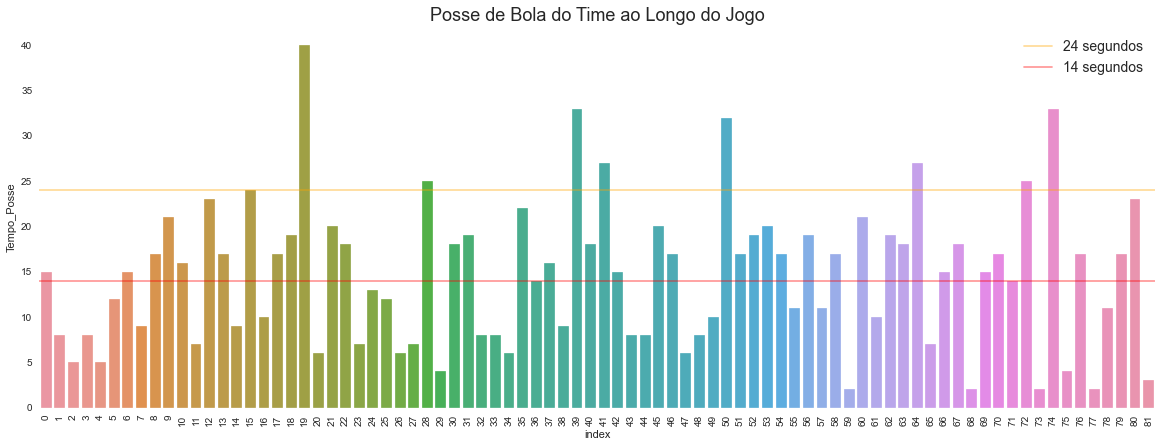

In [82]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Tempo_Posse', data=grafico_posse_time1)
plt.title('Posse de Bola do Time ao Longo do Jogo', fontsize=18)
plt.xticks(rotation=90)
plt.axhline(24, color='orange', alpha=0.4, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.4, label = '14 segundos')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

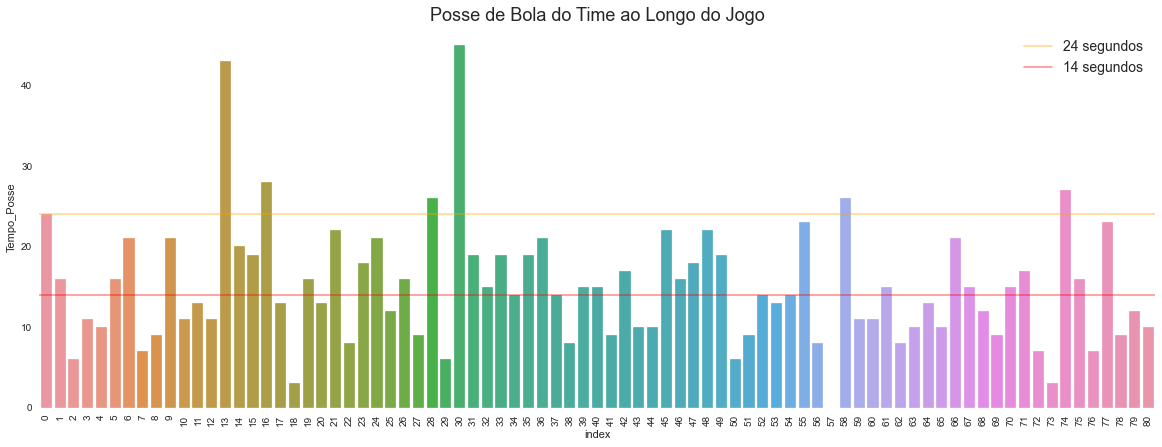

In [83]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Tempo_Posse', data=grafico_posse_time2)
plt.title('Posse de Bola do Time ao Longo do Jogo', fontsize=18)
plt.xticks(rotation=90)
plt.axhline(24, color='orange', alpha=0.4, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.4, label = '14 segundos')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

# Tabela de dados geral

In [84]:
Tabela_Geral = df[['Time','Indicador','Nome']]

In [85]:
Tabela_Geral

,Time,Indicador,Nome
0,NaN,fim_partida,NaN
1,NaN,fim_quarto,NaN
2,UFC,RD,Gemerson
3,RCB,2_Pts_T,Thiaguinho
4,RCB,RD,Ansaloni
...,...,...,...
570,UFC,substituicao_entra,D Nunes
571,UFC,substituicao_entra,Antonio
572,UFC,substituicao_entra,Gabriel
573,UFC,substituicao_entra,Spencer


In [86]:
Tabela_Geral_Time1 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_a]
Tabela_Geral_Time2 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_b]

In [87]:
Tabela_Geral_Time1

,Time,Indicador,Nome
2,UFC,RD,Gemerson
5,UFC,2_Pts_T,Antonio
6,UFC,RD,Gabriel
11,UFC,substituicao_entra,Pepo Vidal
12,UFC,substituicao_sai,Gemadinha
...,...,...,...
569,UFC,substituicao_entra,Barnes
570,UFC,substituicao_entra,D Nunes
571,UFC,substituicao_entra,Antonio
572,UFC,substituicao_entra,Gabriel


In [88]:
tabela_time1 = Tabela_Geral_Time1.groupby(['Nome', 'Indicador']).count()
tabela_time2 = Tabela_Geral_Time2.groupby(['Nome', 'Indicador']).count()

In [89]:
tabela_time1

Time
Nome      Indicador               
Antonio   2_Pts_C                3
          2_Pts_T                3
          3_Pts_C                2
          3_Pts_T                2
          AS                     1
...                            ...
Spencer   LL_Pts_T               3
          RD                     2
          substituicao_entra     4
          substituicao_sai       2
UNIFACISA RD                     1

[112 rows x 1 columns]

In [90]:
tabela_time2

Time
Nome       Indicador               
Ansaloni   2_Pts_C                3
           2_Pts_T                3
           3_Pts_C                2
           3_Pts_T                3
           AS                     1
...                             ...
Thiaguinho FR                     2
           LL_Pts_C               1
           RD                     2
           substituicao_entra     7
           substituicao_sai       5

[98 rows x 1 columns]

In [91]:
tabela_time1_pivot = tabela_time1.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T
tabela_time2_pivot = tabela_time2.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T

In [92]:
tabela_time1_pivot

Indicador        2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  EN  ER  FC  FC_O  \
     Nome                                                                       
Time Antonio           3        3        2        2   1   3   0   2   4     0   
     Barnes            6        7        0        4   7   0   0   0   1     0   
     D Nunes           2        0        1        2   1   2   1   3   2     2   
     Gabriel           2        1        2        3   2   1   0   1   3     0   
     Gemadinha         1        1        4        3   1   2   0   1   2     0   
     Gemerson          1        0        1        2   2   3   0   0   2     0   
     João Vitor        5        4        0        0   0   0   3   0   2     0   
     Pepo Vidal        2        1        1        1   5   0   0   1   2     0   
     Pezão             0        0        0        0   0   0   0   0   0     0   
     Spencer           0        2        0        1   1   0   0   0   3     0   
     UNIFACISA         0        0        0        0   0   0   0   0   0     0   

Indicador        FR  LL_Pts_C  LL_Pts_T  RD  RO  substituicao_entra  \
     Nome                                                             
Time Antonio      2         3         0   3   1                   2   
     Barnes       4         2         3   2   1                   3   
     D Nunes      1         1         0   4   0                   2   
     Gabriel      4         1         2   3   0                   4   
     Gemadinha    3         3         0   4   0                   4   
     Gemerson     2         1         0   3   0                   3   
     João Vitor   4         4         1   5   4                   4   
     Pepo Vidal   0         0         0   4   1                   3   
     Pezão        0         0         0   0   0                   1   
     Spencer      2         1         3   2   0                   4   
     UNIFACISA    0         0         0   1   0                   0   

Indicador        substituicao_sai  
     Nome                          
Time Antonio                    3  
     Barnes                     3  
     D Nunes                    3  
     Gabriel                    4  
     Gemadinha                  4  
     Gemerson                   1  
     João Vitor                 3  
     Pepo Vidal                 2  
     Pezão                      0  
     Spencer                    2  
     UNIFACISA                  0

In [93]:
tabela_time2_pivot

Indicador        2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  ER  FC  FC_A  \
     Nome                                                                   
Time Ansaloni          3        3        2        3   1   0   0   3     1   
     Baxley            2        5        1        2   2   0   2   5     0   
     Gerson            3        5        0        0   1   0   0   3     0   
     Lelê              0        0        0        0   0   1   0   1     0   
     Lucious           3        2        4        3   3   2   7   1     0   
     Pastor            3        0        2        3   0   0   0   3     1   
     Pedro             3        1        0        1   2   0   1   1     0   
     Rio Claro         0        0        0        0   0   0   0   0     0   
     Sahdi             0        1        1        3   6   1   3   2     0   
     Thiaguinho        3        2        0        2   0   0   0   1     0   

Indicador        FC_T  FR  LL_Pts_C  LL_Pts_T  RD  RO  substituicao_entra  \
     Nome                                                                   
Time Ansaloni       0   5         3         1   4   3                   6   
     Baxley         0   3         0         2   2   2                   3   
     Gerson         0   1         1         1   7   1                   5   
     Lelê           0   0         0         0   0   0                   6   
     Lucious        1   3         1         1   1   0                   4   
     Pastor         0   0         0         0   5   0                   3   
     Pedro          0   2         4         0   0   0                   4   
     Rio Claro      0   0         0         0   5   1                   0   
     Sahdi          0   7         6         0   6   0                   3   
     Thiaguinho     0   2         1         0   2   0                   7   

Indicador        substituicao_sai  
     Nome                          
Time Ansaloni                   6  
     Baxley                     6  
     Gerson                     5  
     Lelê                       4  
     Lucious                    4  
     Pastor                     2  
     Pedro                      1  
     Rio Claro                  0  
     Sahdi                      3  
     Thiaguinho                 5

In [94]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = []
for i in tabela_time1_pivot:
    valores_coluna_time1.append(i)

tamanho_df_pivot = len(tabela_time1_pivot)
if valores_coluna_time1 != 'TO':
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['TO'] = toco
if valores_coluna_time1 != 'FC_O':
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_O'] = fco  
if valores_coluna_time1 != 'FC_T':
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_T'] = fct   
if valores_coluna_time1 != 'FC_A':
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_A'] = fca
if valores_coluna_time1 != 'EN':
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['EN'] = en

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [95]:
tabela_time1_pivot.head(5)

Indicador       2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  EN  ER  FC  FC_O  \
     Nome                                                                      
Time Antonio          3        3        2        2   1   3   0   2   4     0   
     Barnes           6        7        0        4   7   0   0   0   1     0   
     D Nunes          2        0        1        2   1   2   0   3   2     0   
     Gabriel          2        1        2        3   2   1   0   1   3     0   
     Gemadinha        1        1        4        3   1   2   0   1   2     0   

Indicador       ...  substituicao_entra  substituicao_sai  TO  FC_T  FC_A  \
     Nome       ...                                                         
Time Antonio    ...                   2                 3   0     0     0   
     Barnes     ...                   3                 3   0     0     0   
     D Nunes    ...                   2                 3   0     0     0   
     Gabriel    ...                   4                 4   0     0     0   
     Gemadinha  ...                   4                 4   0     0     0   

Indicador            Time   Oponente       Data  Casa/Fora  \
     Nome                                                    
Time Antonio    UNIFACISA  Rio Claro 2019-10-12          1   
     Barnes     UNIFACISA  Rio Claro 2019-10-12          1   
     D Nunes    UNIFACISA  Rio Claro 2019-10-12          1   
     Gabriel    UNIFACISA  Rio Claro 2019-10-12          1   
     Gemadinha  UNIFACISA  Rio Claro 2019-10-12          1   

Indicador       Classificatoria/Playoffs  
     Nome                                 
Time Antonio                     1 Turno  
     Barnes                      1 Turno  
     D Nunes                     1 Turno  
     Gabriel                     1 Turno  
     Gemadinha                   1 Turno  

[5 rows x 25 columns]

In [96]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time2 = []
for i in tabela_time2_pivot:
    valores_coluna_time2.append(i)

tamanho_df_pivot = len(tabela_time2_pivot)
if valores_coluna_time2 != 'TO':
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['TO'] = toco
if valores_coluna_time2 != 'FC_O':
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_O'] = fco  
if valores_coluna_time2 != 'FC_T':
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_T'] = fct   
if valores_coluna_time2 != 'FC_A':
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_A'] = fca
if valores_coluna_time2 != 'EN':
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['EN'] = en
    
nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Time'] = nome_time_fora0

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Oponente'] = nome_time_casa0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Data'] = dia_do_jogo0

fora0 = [fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Casa/Fora'] = fora0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Classificatoria/Playoffs'] = classificatoria0  

In [97]:
tabela_time2_pivot.head(5)

Indicador      2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  ER  FC  FC_A  FC_T  \
     Nome                                                                       
Time Ansaloni        3        3        2        3   1   0   0   3     0     0   
     Baxley          2        5        1        2   2   0   2   5     0     0   
     Gerson          3        5        0        0   1   0   0   3     0     0   
     Lelê            0        0        0        0   0   1   0   1     0     0   
     Lucious         3        2        4        3   3   2   7   1     0     0   

Indicador      ...  substituicao_entra  substituicao_sai  TO  FC_O  EN  \
     Nome      ...                                                       
Time Ansaloni  ...                   6                 6   0     0   0   
     Baxley    ...                   3                 6   0     0   0   
     Gerson    ...                   5                 5   0     0   0   
     Lelê      ...                   6                 4   0     0   0   
     Lucious   ...                   4                 4   0     0   0   

Indicador           Time   Oponente       Data  Casa/Fora  \
     Nome                                                   
Time Ansaloni  Rio Claro  UNIFACISA 2019-10-12          2   
     Baxley    Rio Claro  UNIFACISA 2019-10-12          2   
     Gerson    Rio Claro  UNIFACISA 2019-10-12          2   
     Lelê      Rio Claro  UNIFACISA 2019-10-12          2   
     Lucious   Rio Claro  UNIFACISA 2019-10-12          2   

Indicador      Classificatoria/Playoffs  
     Nome                                
Time Ansaloni                   1 Turno  
     Baxley                     1 Turno  
     Gerson                     1 Turno  
     Lelê                       1 Turno  
     Lucious                    1 Turno  

[5 rows x 25 columns]

### preciso manter separado para poder fazer a soma e dar o valor do time

In [98]:
Time1_Final = pd.DataFrame()
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Oponente'] = tabela_time1_pivot['Oponente']
Time1_Final['Data'] = tabela_time1_pivot['Data']
Time1_Final['Casa/Fora'] = tabela_time1_pivot['Casa/Fora']
Time1_Final['Classificatoria/Playoffs'] = tabela_time1_pivot['Classificatoria/Playoffs']
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Pts_3_C'] = tabela_time1_pivot['3_Pts_C']
Time1_Final['Pts_3_T'] = tabela_time1_pivot['3_Pts_T']
Time1_Final['Pts_2_C'] = tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']
Time1_Final['Pts_2_T'] = tabela_time1_pivot['2_Pts_T']
Time1_Final['LL_C'] = tabela_time1_pivot['LL_Pts_C']
Time1_Final['LL_T'] = tabela_time1_pivot['LL_Pts_T']
Time1_Final['RO'] = tabela_time1_pivot['RO']
Time1_Final['RD'] = tabela_time1_pivot['RD']
Time1_Final['RT'] = tabela_time1_pivot['RO'] + tabela_time1_pivot['RD']
Time1_Final['AS'] = tabela_time1_pivot['AS']
Time1_Final['BR'] = tabela_time1_pivot['BR']
Time1_Final['TO'] = tabela_time1_pivot['TO']
Time1_Final['FC'] = tabela_time1_pivot['FC'] + tabela_time1_pivot['FC_T']+tabela_time1_pivot['FC_O']+tabela_time1_pivot['FC_A']
Time1_Final['FR'] = tabela_time1_pivot['FR']
Time1_Final['ER'] = tabela_time1_pivot['ER']
Time1_Final['EN'] = tabela_time1_pivot['EN']
Time1_Final['substituicao_entra'] = tabela_time1_pivot['substituicao_entra']
Time1_Final['substituicao_sai'] = tabela_time1_pivot['substituicao_sai']

In [99]:
Time2_Final = pd.DataFrame()
Time2_Final['Time'] = tabela_time2_pivot['Time']
Time2_Final['Oponente'] = tabela_time2_pivot['Oponente']
Time2_Final['Data'] = tabela_time2_pivot['Data']
Time2_Final['Casa/Fora'] = tabela_time2_pivot['Casa/Fora']
Time2_Final['Classificatoria/Playoffs'] = tabela_time2_pivot['Classificatoria/Playoffs']
Time2_Final['Pts_3_C'] = tabela_time2_pivot['3_Pts_C']
Time2_Final['Pts_3_T'] = tabela_time2_pivot['3_Pts_T']
Time2_Final['Pts_2_C'] = tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']
Time2_Final['Pts_2_T'] = tabela_time2_pivot['2_Pts_T']
Time2_Final['LL_C'] = tabela_time2_pivot['LL_Pts_C']
Time2_Final['LL_T'] = tabela_time2_pivot['LL_Pts_T']
Time2_Final['RO'] = tabela_time2_pivot['RO']
Time2_Final['RD'] = tabela_time2_pivot['RD']
Time2_Final['RT'] = tabela_time2_pivot['RO'] + tabela_time2_pivot['RD']
Time2_Final['AS'] = tabela_time2_pivot['AS']
Time2_Final['BR'] = tabela_time2_pivot['BR']
Time2_Final['TO'] = tabela_time2_pivot['TO']
Time2_Final['FC'] = tabela_time2_pivot['FC'] + tabela_time2_pivot['FC_T']+tabela_time2_pivot['FC_O']+tabela_time2_pivot['FC_A']
Time2_Final['FR'] = tabela_time2_pivot['FR']
Time2_Final['ER'] = tabela_time2_pivot['ER']
Time2_Final['EN'] = tabela_time2_pivot['EN']
Time2_Final['substituicao_entra'] = tabela_time2_pivot['substituicao_entra']
Time2_Final['substituicao_sai'] = tabela_time2_pivot['substituicao_sai']

In [100]:
Time1_Final.reset_index(inplace=True)
Time1_Final.drop(['level_0'], axis=1, inplace=True)
Time1_Final

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,RT,AS,BR,TO,FC,FR,ER,EN,substituicao_entra,substituicao_sai
0,Antonio,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,2,2,3,3,...,4,1,3,0,4,2,2,0,2,3
1,Barnes,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,4,6,7,...,3,7,0,0,1,4,0,0,3,3
2,D Nunes,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,2,2,0,...,4,1,2,0,2,1,3,0,2,3
3,Gabriel,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,2,3,2,1,...,3,2,1,0,3,4,1,0,4,4
4,Gemadinha,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,4,3,1,1,...,4,1,2,0,2,3,1,0,4,4
5,Gemerson,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,2,1,0,...,3,2,3,0,2,2,0,0,3,1
6,João Vitor,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,0,5,4,...,9,0,0,0,2,4,0,0,4,3
7,Pepo Vidal,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,1,2,1,...,5,5,0,0,2,0,1,0,3,2
8,Pezão,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,Spencer,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,1,0,2,...,2,1,0,0,3,2,0,0,4,2


In [101]:
Time2_Final.reset_index(inplace=True)
Time2_Final.drop(['level_0'], axis=1, inplace=True)
Time2_Final

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,RT,AS,BR,TO,FC,FR,ER,EN,substituicao_entra,substituicao_sai
0,Ansaloni,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,2,3,3,3,...,7,1,0,0,3,5,0,0,6,6
1,Baxley,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,1,2,2,5,...,4,2,0,0,5,3,2,0,3,6
2,Gerson,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,3,5,...,8,1,0,0,3,1,0,0,5,5
3,Lelê,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,0,0,...,0,0,1,0,1,0,0,0,6,4
4,Lucious,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,4,3,3,2,...,1,3,2,0,1,3,7,0,4,4
5,Pastor,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,2,3,3,0,...,5,0,0,0,3,0,0,0,3,2
6,Pedro,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,1,3,1,...,0,2,0,0,1,2,1,0,4,1
7,Rio Claro,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
8,Sahdi,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,1,3,0,1,...,6,6,1,0,2,7,3,0,3,3
9,Thiaguinho,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,2,3,2,...,2,0,0,0,1,2,0,0,7,5


### Como é um teste preciso descobrir substituir str diretamente 

In [102]:
Time1_Final['Nome'].replace(nome_time_casa, 'Açõe coletivas', inplace=True)

In [103]:
Time2_Final['Nome'].replace(nome_time_fora, 'Açõe coletivas', inplace=True)

In [104]:
resultado_Time1 = Time1_Final.sum()
resultado_Time2 = Time2_Final.sum()

In [105]:
resultado_Time1['Nome'] = 'Equipe'
resultado_Time2['Nome'] = 'Equipe'
resultado_Time1['Time'] = nome_time_casa
resultado_Time2['Time'] = nome_time_fora
resultado_Time1['Oponente'] = nome_time_fora
resultado_Time2['Oponente'] = nome_time_casa
resultado_Time1['Data'] = dia_do_jogo
resultado_Time2['Data'] = dia_do_jogo
resultado_Time1['Casa/Fora'] = casa
resultado_Time2['Casa/Fora'] = fora
resultado_Time1['Classificatoria/Playoffs'] = classificatoria
resultado_Time2['Classificatoria/Playoffs'] = classificatoria

In [106]:
Time1_Final = Time1_Final.append(resultado_Time1, ignore_index=True)
Time2_Final = Time2_Final.append(resultado_Time2, ignore_index=True)

In [107]:
Time1_Final['Ar_Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] -  Time1_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time1_Final['Ar_Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] + Time1_Final['Ar_Pts_C'] # NÃO contabiliza EN
Time1_Final['Pts_C'] = (Time1_Final['Pts_3_C'] * 3) + (Time1_Final['Pts_2_C'] * 2) + Time1_Final['LL_C']
Time1_Final['Pts_T'] = (Time1_Final['Pts_3_T'] * 3) + (Time1_Final['Pts_2_T'] * 2) + Time1_Final['LL_T'] + Time1_Final['Pts_C']

In [108]:
Time1_Final['posse_de_bola'] = round(Time1_Final['Ar_Pts_T'] - Time1_Final['RO'] + Time1_Final['ER'] + (0.4 * Time1_Final['LL_T']), 0)

In [109]:
Time2_Final['Ar_Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] -  Time2_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time2_Final['Ar_Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T'] + Time2_Final['Ar_Pts_C'] # NÃO contabiliza EN
Time2_Final['Pts_C'] = (Time2_Final['Pts_3_C'] * 3) + (Time2_Final['Pts_2_C'] * 2) + Time2_Final['LL_C']
Time2_Final['Pts_T'] = (Time2_Final['Pts_3_T'] * 3) + (Time2_Final['Pts_2_T'] * 2) + Time2_Final['LL_T'] + Time2_Final['Pts_C']

In [110]:
Time2_Final['posse_de_bola'] = round(Time2_Final['Ar_Pts_T'] - Time2_Final['RO'] + Time2_Final['ER'] + (0.4 * Time2_Final['LL_T']), 0)

In [111]:
# esse código é para a criação dos gráficos de comparação
tabela_times = pd.concat([Time1_Final[Time1_Final['Nome'] == 'Equipe'], Time2_Final[Time2_Final['Nome'] == 'Equipe']], ignore_index=True)
tabela_times

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Equipe,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,11,18,22,19,...,22,8,0,30,25,33,70,93,194,75.0
1,Equipe,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,10,17,20,19,...,23,13,0,41,36,30,66,86,180,74.0


# Acrescentar a diferença do placar e vitória derrota

In [112]:
dif_placar_geral = tabela_times['Pts_C'].diff()

In [113]:
# acrescenta a diferença do placar do times 
positivo = []
negativo = []
resul_dif = []
op_1 = [1, 2]
op_2 = [2, 1]
tamanho_df_pivot = len(Time1_Final)
tamanho_df_pivot0 = len(Time2_Final)
if dif_placar_geral[1] <= 0:
    positivo = abs(dif_placar_geral[1])
    negativo = dif_placar_geral[1]
    resul_dif = [positivo, negativo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_1
    ################################################
    vit_der = [1 for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [positivo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = [2 for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [negativo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0
else:
    positivo = dif_placar_geral[1]
    negativo = -(dif_placar_geral[1])
    resul_dif = [negativo, positivo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_2
    ################################################
    vit_der = [2 for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [negativo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = [1 for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [positivo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0

In [114]:
tabela_times

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,Equipe,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,11,18,22,19,...,0,30,25,33,70,93,194,75.0,7.0,1
1,Equipe,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,10,17,20,19,...,0,41,36,30,66,86,180,74.0,-7.0,2


In [115]:
Time1_Final.head(5)

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Antonio,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,2,2,3,3,...,0,2,3,5,10,15,27,11.0,1,7.0
1,Barnes,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,4,6,7,...,0,3,3,6,17,14,43,17.0,1,7.0
2,D Nunes,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,2,2,0,...,0,2,3,3,5,8,14,8.0,1,7.0
3,Gabriel,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,2,3,2,1,...,0,4,4,4,8,11,24,10.0,1,7.0
4,Gemadinha,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,4,3,1,1,...,0,4,4,5,9,17,28,10.0,1,7.0


In [116]:
Time2_Final.head(5)

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Ansaloni,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,2,3,3,3,...,0,6,6,5,11,15,31,8.0,2,-7.0
1,Baxley,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,1,2,2,5,...,0,3,6,3,10,7,25,11.0,2,-7.0
2,Gerson,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,3,5,...,0,5,5,3,8,7,18,7.0,2,-7.0
3,Lelê,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,0,0,...,0,6,4,0,0,0,0,0.0,2,-7.0
4,Lucious,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,4,3,3,2,...,0,4,4,7,12,19,33,19.0,2,-7.0


In [117]:
Tabela_Final = pd.concat([Time1_Final,Time2_Final]).reset_index(drop=True)

In [118]:
Tabela_Final. head(10)

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Antonio,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,2,2,3,3,...,0,2,3,5,10,15,27,11.0,1,7.0
1,Barnes,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,4,6,7,...,0,3,3,6,17,14,43,17.0,1,7.0
2,D Nunes,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,2,2,0,...,0,2,3,3,5,8,14,8.0,1,7.0
3,Gabriel,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,2,3,2,1,...,0,4,4,4,8,11,24,10.0,1,7.0
4,Gemadinha,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,4,3,1,1,...,0,4,4,5,9,17,28,10.0,1,7.0
5,Gemerson,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,2,1,0,...,0,3,1,2,4,6,12,4.0,1,7.0
6,João Vitor,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,0,5,4,...,0,4,3,5,9,14,23,5.0,1,7.0
7,Pepo Vidal,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,1,1,2,1,...,0,3,2,3,5,7,12,5.0,1,7.0
8,Pezão,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,0,0,0,...,0,1,0,0,0,0,0,0.0,1,7.0
9,Spencer,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,0,1,0,2,...,0,4,2,0,3,1,11,4.0,1,7.0


# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

In [119]:
analise = pd.DataFrame()

In [120]:
analise['Nome'] = Tabela_Final['Nome']  # Jogadores
analise['EF_Pts'] = round(Tabela_Final['Pts_C'] / Tabela_Final['Pts_T'], 3) # eficiência dos pontos totais
analise['FR_3_Pts_C'] = round((Tabela_Final['Pts_3_C'] * 3) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise['FR_3_Pts_T'] = round((Tabela_Final['Pts_3_T'] * 3) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise['EF_Pts_3'] = round(Tabela_Final['Pts_3_C'] / Tabela_Final['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise['FR_2_Pts_C'] = round((Tabela_Final['Pts_2_C'] * 2) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise['FR_2_Pts_T'] = round((Tabela_Final['Pts_2_T'] * 2) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise['EF_Pts_2'] = round(Tabela_Final['Pts_2_C'] / Tabela_Final['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise['FR_LL_C'] = round(Tabela_Final['LL_C'] / Tabela_Final['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise['FR_LL_T'] = round(Tabela_Final['LL_T'] / Tabela_Final['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise['EF_LL'] = round(Tabela_Final['LL_C'] /Tabela_Final['LL_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise['eFG_%'] = round((Tabela_Final['Ar_Pts_C'] + 0.5 * Tabela_Final['Pts_3_C']) / Tabela_Final['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise['TOV_%'] = round(100 * Tabela_Final['ER'] / (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'] + Tabela_Final['ER']), 1)  # fator turnover
analise['FTA/FGA'] = round(Tabela_Final['LL_T'] / Tabela_Final['Ar_Pts_C'], 3)  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise['Posse_de_Bola']  = Tabela_Final['posse_de_bola']   # posse de bola 
analise['Offensive_Rating'] = 100 * round(Tabela_Final['Pts_C']/Tabela_Final['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise['TS_%'] = round(Tabela_Final['Pts_C'] / (2*(Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'])), 3)  # porcentagem dos arremessos
analise['Ass/ER'] = round(Tabela_Final['AS'] / Tabela_Final['ER'], 3)  # assistência por erros
analise['AS_Ratio'] = 100 * round((Tabela_Final['AS'] / Tabela_Final['posse_de_bola']), 3)  # assistências por posse de bola 
analise.reset_index();

In [121]:
analise

,Nome,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,Antonio,0.556,0.400,0.222,1.000,0.400,0.222,1.000,0.200,0.000,inf,0.600,16.7,0.000,11.0,136.4,0.750,0.500,9.1
1,Barnes,0.326,0.000,0.279,0.000,0.857,0.326,0.857,0.143,0.070,0.667,0.353,0.0,0.500,17.0,82.4,0.380,inf,41.2
2,D Nunes,0.571,0.375,0.429,0.500,0.500,0.000,inf,0.125,0.000,inf,0.700,37.5,0.000,8.0,100.0,0.800,0.333,12.5
3,Gabriel,0.458,0.545,0.375,0.667,0.364,0.083,2.000,0.091,0.083,0.500,0.625,10.1,0.500,10.0,110.0,0.615,2.000,20.0
4,Gemadinha,0.607,0.706,0.321,1.333,0.118,0.071,1.000,0.176,0.000,inf,0.778,10.0,0.000,10.0,170.0,0.944,1.000,10.0
5,Gemerson,0.500,0.500,0.500,0.500,0.333,0.000,inf,0.167,0.000,inf,0.625,0.0,0.000,4.0,150.0,0.750,inf,50.0
6,João Vitor,0.609,0.000,0.000,NaN,0.714,0.348,1.250,0.286,0.043,4.000,0.556,0.0,0.200,5.0,280.0,0.739,NaN,0.0
7,Pepo Vidal,0.583,0.429,0.250,1.000,0.571,0.167,2.000,0.000,0.000,NaN,0.700,16.7,0.000,5.0,140.0,0.700,5.000,100.0
8,Pezão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
9,Spencer,0.091,0.000,0.273,0.000,0.000,0.364,0.000,1.000,0.273,0.333,0.000,0.0,inf,4.0,25.0,0.113,inf,25.0


# colocar uma tabela geral com análises 

In [122]:
grafico_Time1_Final = Time1_Final[['Time' ,'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time1_Final.head()

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,UNIFACISA,Antonio,15,27,2,2,3,3,3,0,1,3,4,1,3,0,4,2,2,0
1,UNIFACISA,Barnes,14,43,0,4,6,7,2,3,1,2,3,7,0,0,1,4,0,0
2,UNIFACISA,D Nunes,8,14,1,2,2,0,1,0,0,4,4,1,2,0,2,1,3,0
3,UNIFACISA,Gabriel,11,24,2,3,2,1,1,2,0,3,3,2,1,0,3,4,1,0
4,UNIFACISA,Gemadinha,17,28,4,3,1,1,3,0,0,4,4,1,2,0,2,3,1,0


In [123]:
dfi.export(grafico_Time1_Final, 'RELATORIO/teste5.png')

In [124]:
grafico_Time2_Final = Time2_Final[['Time', 'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time2_Final.head()

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,Rio Claro,Ansaloni,15,31,2,3,3,3,3,1,3,4,7,1,0,0,3,5,0,0
1,Rio Claro,Baxley,7,25,1,2,2,5,0,2,2,2,4,2,0,0,5,3,2,0
2,Rio Claro,Gerson,7,18,0,0,3,5,1,1,1,7,8,1,0,0,3,1,0,0
3,Rio Claro,Lelê,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,Rio Claro,Lucious,19,33,4,3,3,2,1,1,0,1,1,3,2,0,1,3,7,0


In [125]:
dfi.export(grafico_Time2_Final, 'RELATORIO/teste6.png')

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time1'

### Time 1

In [126]:
melhor_jogador_time1 = Time2_Final[(Time2_Final['Nome']!='Equipe') & (Time2_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time1

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Ansaloni,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,2,3,3,3,...,0,6,6,5,11,15,31,8.0,2,-7.0
1,Baxley,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,1,2,2,5,...,0,3,6,3,10,7,25,11.0,2,-7.0
2,Gerson,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,3,5,...,0,5,5,3,8,7,18,7.0,2,-7.0
3,Lelê,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,0,0,0,...,0,6,4,0,0,0,0,0.0,2,-7.0
4,Lucious,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,4,3,3,2,...,0,4,4,7,12,19,33,19.0,2,-7.0
5,Pastor,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,2,3,3,0,...,0,3,2,5,8,12,21,8.0,2,-7.0
6,Pedro,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,1,3,1,...,0,4,1,3,5,10,15,6.0,2,-7.0
8,Sahdi,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,1,3,0,1,...,0,3,3,1,5,9,20,8.0,2,-7.0
9,Thiaguinho,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,0,2,3,2,...,0,7,5,3,7,7,17,7.0,2,-7.0


In [127]:
pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_1

,Nome,Pts_C
0,Lucious,19
1,Ansaloni,15
2,Pastor,12
3,Pedro,10
4,Sahdi,9


In [128]:
pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_t_1

,Nome,Pts_C
0,Lucious,19
1,Ansaloni,15
2,Baxley,7
3,Pastor,12
4,Sahdi,9


In [129]:
tres_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_1

,Nome,Pts_3_C
0,Lucious,4
1,Ansaloni,2
2,Pastor,2
3,Baxley,1
4,Sahdi,1


In [130]:
tres_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_1

,Nome,Pts_3_T
0,Ansaloni,3
1,Lucious,3
2,Pastor,3
3,Sahdi,3
4,Baxley,2


In [131]:
dois_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_1

,Nome,Pts_2_C
0,Ansaloni,3
1,Gerson,3
2,Lucious,3
3,Pastor,3
4,Pedro,3


In [132]:
dois_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_1

,Nome,Pts_2_T
0,Baxley,5
1,Gerson,5
2,Ansaloni,3
3,Lucious,2
4,Thiaguinho,2


In [133]:
ll_c_1 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_1

,Nome,LL_C
0,Sahdi,6
1,Pedro,4
2,Ansaloni,3
3,Gerson,1
4,Lucious,1


In [134]:
ll_t_1 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_1

,Nome,LL_C
0,Sahdi,6
1,Pedro,4
2,Ansaloni,3
3,Gerson,1
4,Lucious,1


In [135]:
ro_1 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_1

,Nome,RO
0,Ansaloni,3
1,Baxley,2
2,Gerson,1
3,Lelê,0
4,Lucious,0


In [136]:
rd_1 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_1

,Nome,RD
0,Gerson,7
1,Sahdi,6
2,Pastor,5
3,Ansaloni,4
4,Baxley,2


In [137]:
rt_1 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_1

,Nome,RT
0,Gerson,8
1,Ansaloni,7
2,Sahdi,6
3,Pastor,5
4,Baxley,4


In [138]:
as_1 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_1

,Nome,AS
0,Sahdi,6
1,Lucious,3
2,Baxley,2
3,Pedro,2
4,Ansaloni,1


In [139]:
br_1 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_1

,Nome,BR
0,Lucious,2
1,Lelê,1
2,Sahdi,1
3,Ansaloni,0
4,Baxley,0


In [140]:
fr_1 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_1

,Nome,FR
0,Sahdi,7
1,Ansaloni,5
2,Baxley,3
3,Lucious,3
4,Pedro,2


In [141]:
er_1 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_1

,Nome,ER
0,Lucious,7
1,Sahdi,3
2,Baxley,2
3,Pedro,1
4,Ansaloni,0


# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time2'

### Time 1

In [142]:
pontos_t_2 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_t_2

,Nome,Pts_C
0,Lucious,19
1,Ansaloni,15
2,Baxley,7
3,Pastor,12
4,Sahdi,9


In [143]:
tres_pontos_c_2 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_2

,Nome,Pts_3_C
0,Lucious,4
1,Ansaloni,2
2,Pastor,2
3,Baxley,1
4,Sahdi,1


In [144]:
tres_pontos_t_2 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_2

,Nome,Pts_3_T
0,Ansaloni,3
1,Lucious,3
2,Pastor,3
3,Sahdi,3
4,Baxley,2


In [145]:
dois_pontos_c_2 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_2

,Nome,Pts_2_C
0,Ansaloni,3
1,Gerson,3
2,Lucious,3
3,Pastor,3
4,Pedro,3


In [146]:
dois_pontos_t_2 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_2

,Nome,Pts_2_T
0,Baxley,5
1,Gerson,5
2,Ansaloni,3
3,Lucious,2
4,Thiaguinho,2


In [147]:
ll_c_2 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_2

,Nome,LL_C
0,Sahdi,6
1,Pedro,4
2,Ansaloni,3
3,Gerson,1
4,Lucious,1


In [148]:
ll_t_2 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_2

,Nome,LL_C
0,Sahdi,6
1,Pedro,4
2,Ansaloni,3
3,Gerson,1
4,Lucious,1


In [149]:
ro_2 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_2

,Nome,RO
0,Ansaloni,3
1,Baxley,2
2,Gerson,1
3,Lelê,0
4,Lucious,0


In [150]:
rd_2 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_2

,Nome,RD
0,Gerson,7
1,Sahdi,6
2,Pastor,5
3,Ansaloni,4
4,Baxley,2


In [151]:
rt_2 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_2

,Nome,RT
0,Gerson,8
1,Ansaloni,7
2,Sahdi,6
3,Pastor,5
4,Baxley,4


In [152]:
as_2 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_2

,Nome,AS
0,Sahdi,6
1,Lucious,3
2,Baxley,2
3,Pedro,2
4,Ansaloni,1


In [153]:
br_2 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_2

,Nome,BR
0,Lucious,2
1,Lelê,1
2,Sahdi,1
3,Ansaloni,0
4,Baxley,0


In [154]:
fr_2 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_2

,Nome,FR
0,Sahdi,7
1,Ansaloni,5
2,Baxley,3
3,Lucious,3
4,Pedro,2


In [155]:
er_2 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_2

,Nome,ER
0,Lucious,7
1,Sahdi,3
2,Baxley,2
3,Pedro,1
4,Ansaloni,0


# Gráficos dos Indicadores Técnicos 

In [156]:
tabela_times

,Nome,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,Equipe,UNIFACISA,Rio Claro,2019-10-12,1,1 Turno,11,18,22,19,...,0,30,25,33,70,93,194,75.0,7.0,1
1,Equipe,Rio Claro,UNIFACISA,2019-10-12,2,1 Turno,10,17,20,19,...,0,41,36,30,66,86,180,74.0,-7.0,2


#### Não sei o pq mas quando ploto a primeira vez o eixo X fica zoado, mas na sugunda funciona 

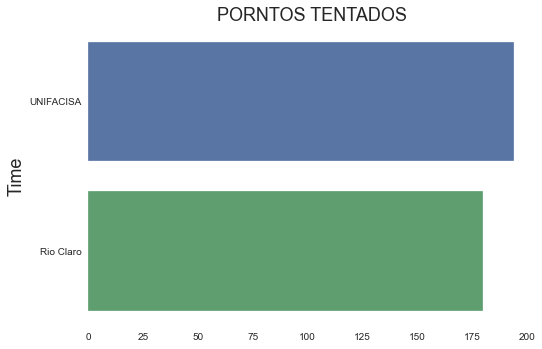

In [157]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16

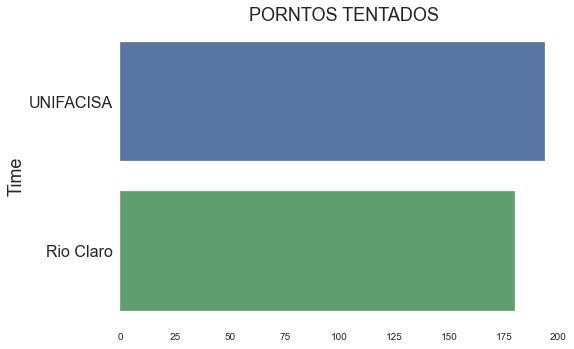

In [158]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_T.png', format='png')

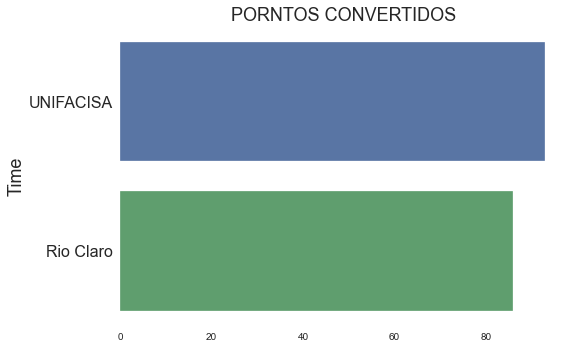

In [159]:
sns.set_style('white')
sns.barplot(x='Pts_C', y='Time', data=tabela_times)
plt.title('PORNTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_C.png', format='png')

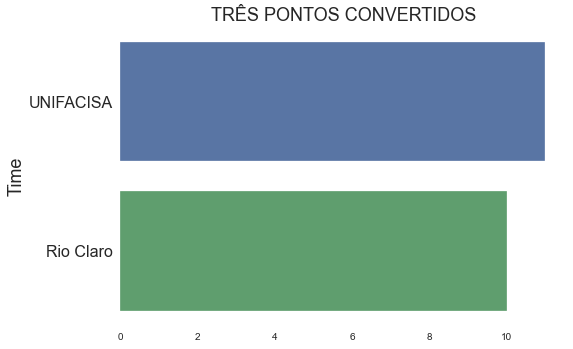

In [160]:
sns.set_style('white')
sns.barplot(x='Pts_3_C', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_3_C.png', format='png')

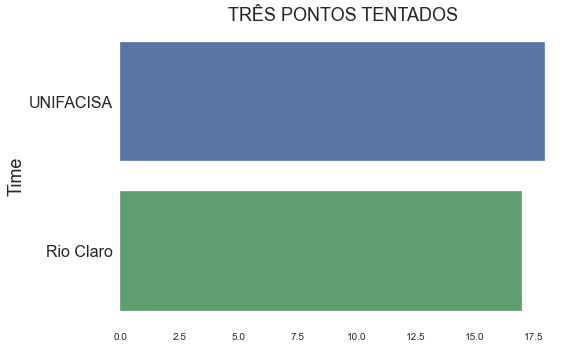

In [161]:
sns.set_style('white')
sns.barplot(x='Pts_3_T', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_3_T.png', format='png')

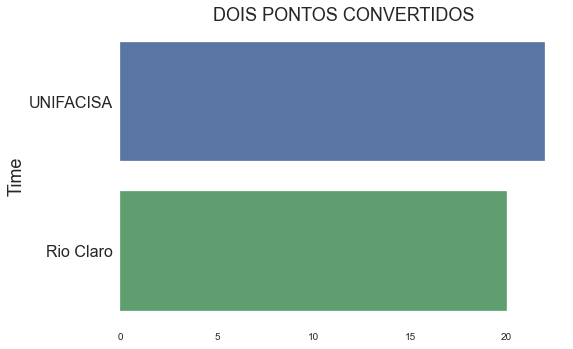

In [162]:
sns.set_style('white')
sns.barplot(x='Pts_2_C', y='Time', data=tabela_times)
plt.title('DOIS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_C.png', format='png')

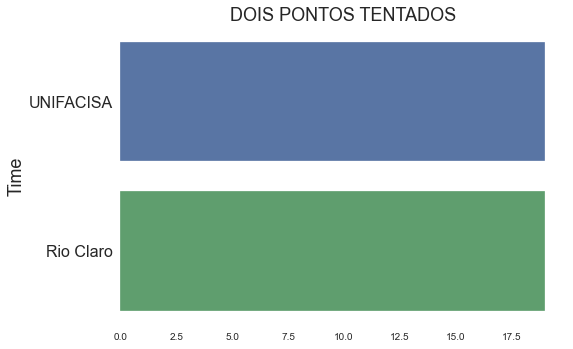

In [163]:
sns.set_style('white')
sns.barplot(x='Pts_2_T', y='Time', data=tabela_times)
plt.title('DOIS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_T.png', format='png')

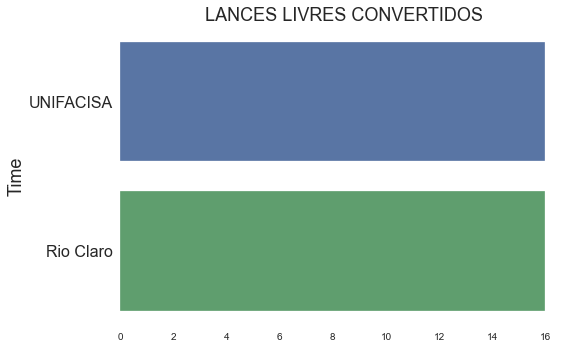

In [164]:
sns.set_style('white')
sns.barplot(x='LL_C', y='Time', data=tabela_times)
plt.title('LANCES LIVRES CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_C.png', format='png')

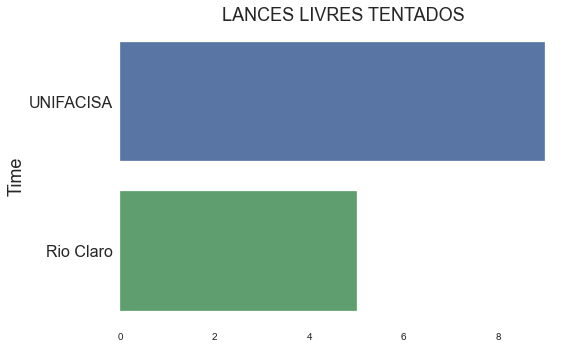

In [165]:
sns.set_style('white')
sns.barplot(x='LL_T', y='Time', data=tabela_times)
plt.title('LANCES LIVRES TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_T.png', format='png')

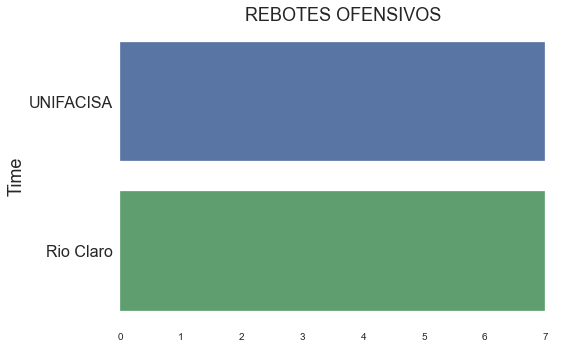

In [166]:
sns.set_style('white')
sns.barplot(x='RO', y='Time', data=tabela_times)
plt.title('REBOTES OFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RO.png', format='png')

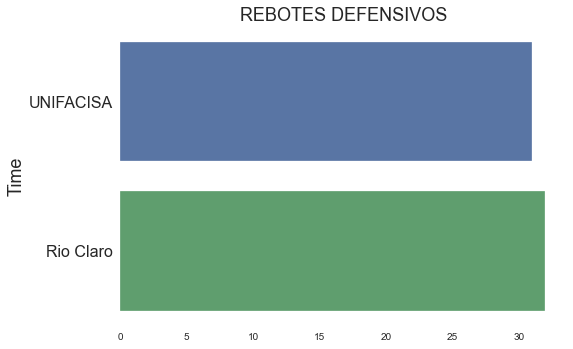

In [167]:
sns.set_style('white')
sns.barplot(x='RD', y='Time', data=tabela_times)
plt.title('REBOTES DEFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RD.png', format='png')

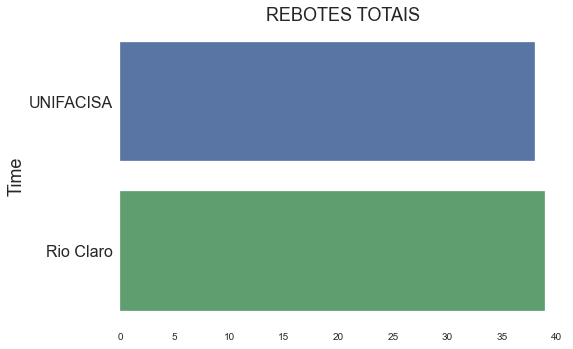

In [168]:
sns.set_style('white')
sns.barplot(x='RT', y='Time', data=tabela_times)
plt.title('REBOTES TOTAIS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RT.png', format='png')

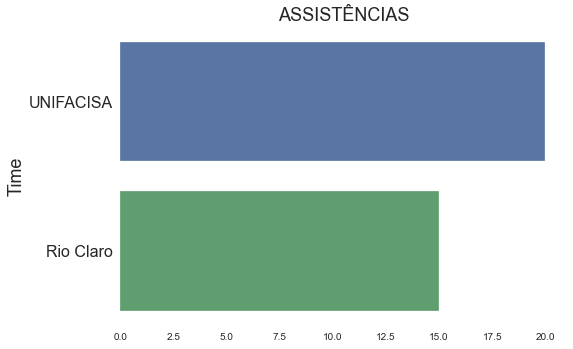

In [169]:
sns.set_style('white')
sns.barplot(x='AS', y='Time', data=tabela_times)
plt.title('ASSISTÊNCIAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/AS.png', format='png')

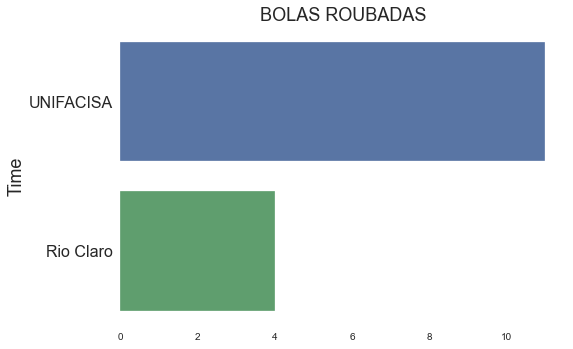

In [170]:
sns.set_style('white')
sns.barplot(x='BR', y='Time', data=tabela_times)
plt.title('BOLAS ROUBADAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/BR.png', format='png')

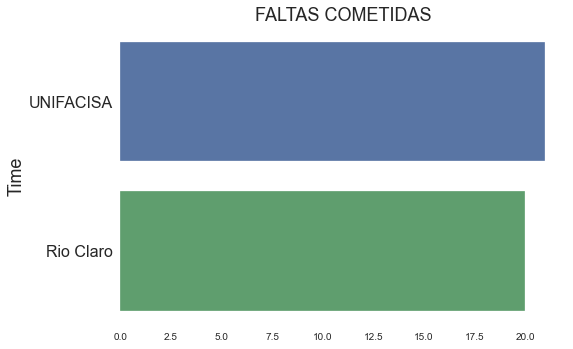

In [171]:
sns.set_style('white')
sns.barplot(x='FC', y='Time', data=tabela_times)
plt.title('FALTAS COMETIDAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/FC.png', format='png')

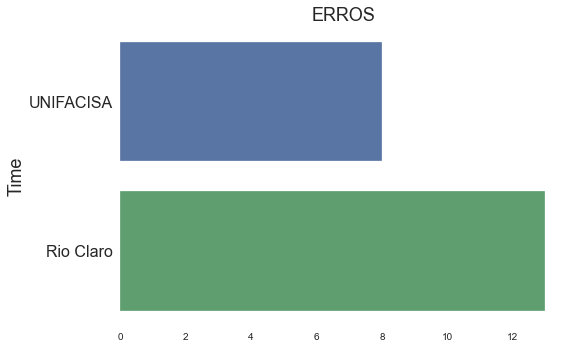

In [172]:
sns.set_style('white')
sns.barplot(x='ER', y='Time', data=tabela_times)
plt.title('ERROS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/ER.png', format='png')

In [173]:
aaaaaaaaaa

NameError: name 'aaaaaaaaaa' is not defined

# Gráficos com as análises avançadas 

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=analise)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
x = pontuacao['Tempo']
y = pontuacao[['placar_casa', 'placar_visitante']]
ax.plot(x, y)
ax.set_title('Gráfico do Placar Acumulativo do Jogo')
ax.set_ylabel('Pontos')
ax.set_xlabel('Segundos')
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)

In [ ]:
aaa

In [ ]:
# posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)

In [ ]:
filtro = (posse_bola['diferenca'] >= 1) | (posse_bola['Indicador'] == 'inicio_partida') | (posse_bola['Indicador'] == 'fim_quarto')
valor_posse_bola = posse_bola[filtro]

In [ ]:
valor_posse_bola

In [ ]:
valor_posse_bola.to_csv('valor_posse_bola.csv')

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(valor_posse_bola['Tempo'], valor_posse_bola['diferenca'])

In [ ]:
Flamengo = df.query("Time == 'FLA'")

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_casa")

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_visitante")

In [ ]:
Flamengo = df.query("Time == 'FLA'").sort_values(by=['Tempo'])

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo.set_index("Tempo", inplace=True)

In [ ]:
placar_flamengo_valor = placar_flamengo['placar_casa']

In [ ]:
placar_flamengo_valor

In [ ]:
plt.figure(figsize=(15,5))
flamengo_media_movel = placar_flamengo_valor.plot()

In [ ]:
flamengo_media_movel = placar_flamengo_valor.rolling(window=10).mean()

In [ ]:
flamengo_media_movel

In [ ]:
flamengo_dev_pad = placar_flamengo_valor.rolling(window=10).std()

In [ ]:
flamengo_dev_pad

In [ ]:
under_line = (flamengo_media_movel-flamengo_dev_pad)
over_line = (flamengo_media_movel+flamengo_dev_pad)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2)
plt.fill_between(flamengo_dev_pad, under_line, over_line, color='b', alpha=.1) #std curves.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2) #mean curve.
plt.fill_between(flamengo_dev_pad.index, under_line, over_line, color='b', alpha=.1) #std curves.

# identificação dos quintetos em quadra 

In [ ]:
# faz um if com o seguinte critério 
# if aparecer substituição_entra:
#     a função adiciona o jogador x
# elif aparecer substituição_sai:
#     a função substitui o valor por 0